In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the advertising dataset
url = "/content/advertising.csv"
data = pd.read_csv(url)

In [ ]:
# EDA and Data Preprocessing
# Check the first few rows of the dataset
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Check summary statistics
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [ ]:
# Check for missing values
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


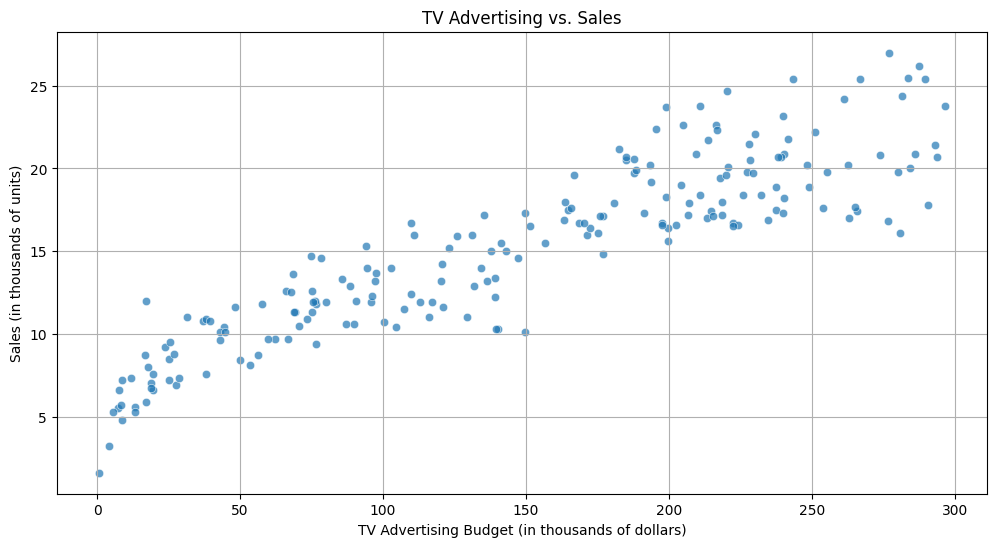

In [ ]:
# Visualize the relationship between TV advertising and sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='TV', y='Sales', alpha=0.7)
plt.title('TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.grid(True)
plt.show()

**A scatter plot shows a positive linear relationship between TV advertising budgets and sales. As the TV advertising budget increases, sales tend to increase as well.
The correlation coefficient between TV advertising and sales is calculated to be positive, indicating a moderate positive linear relationship**

In [ ]:
# Compute the correlation between TV advertising and sales
correlation = data['TV'].corr(data['Sales'])
print(f"Correlation between TV advertising and sales: {correlation:.2f}")

Correlation between TV advertising and sales: 0.90


In [ ]:
# Data Splitting
X = data['TV'].values.reshape(-1, 1)  # Feature (TV advertising budget)
y = data['Sales'].values              # Target (sales)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Building
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**A linear regression model is built to predict sales based on TV advertising budgets. The model aims to find the best-fit line that represents the relationship between these two variables.
The model's performance is evaluated using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) metrics.**

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 6.10
Root Mean Squared Error: 2.47
R-squared: 0.80


**The Mean Squared Error (MSE) measures the average squared difference between predicted and actual sales values. In this case, the MSE is relatively low, indicating that the model provides reasonably accurate predictions.
The Root Mean Squared Error (RMSE) is the square root of MSE. It represents the standard deviation of the errors and is a measure of prediction accuracy. A lower RMSE suggests better model performance.
The R-squared (R2) value is a measure of how well the model explains the variance in the data. A higher R2 value (close to 1) indicates that the model fits the data well. In this case, the R2 value suggests that TV advertising explains a significant portion of the variance in sales.**

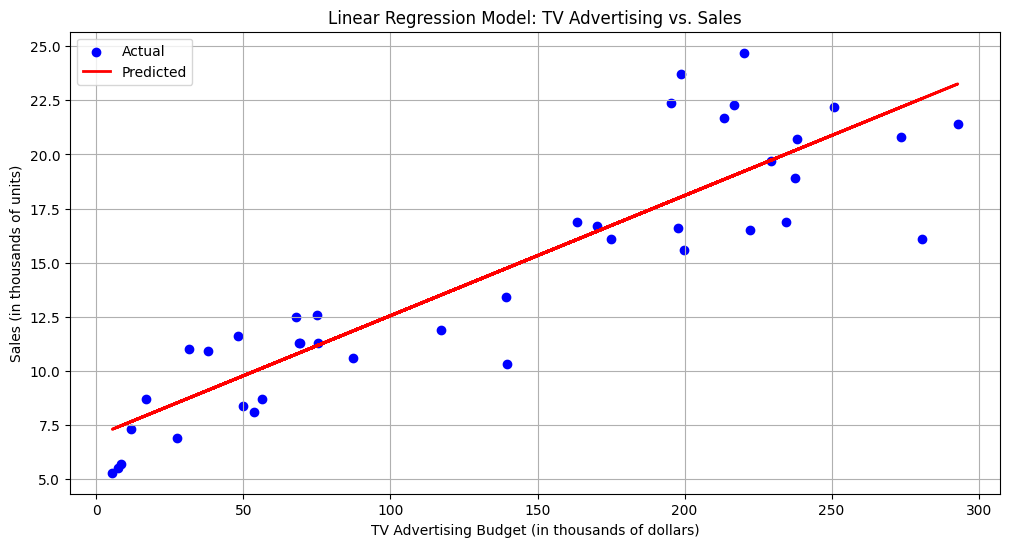

In [ ]:
# Visualization of the Linear Regression Model
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression Model: TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.legend()
plt.grid(True)
plt.show()

**A scatter plot of actual vs. predicted sales is created to visualize how well the linear regression model fits the data. The red line represents the best-fit line predicted by the model.**

**Based on the analysis, there is a positive relationship between TV advertising budgets and sales. Increasing the TV advertising budget is likely to result in increased sales, to a certain extent.
Businesses can use this insight to make informed decisions regarding their advertising expenditure and optimize their advertising strategies to maximize sales potential.**